In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit  # type: ignore
from sklearn.preprocessing import OneHotEncoder

sys.path.append(os.path.dirname(os.getcwd()))
from src import config
from src.dataset import load_housing_data

# DATA EXPLORATION

In [3]:
housing = load_housing_data(config.PATH_DATA_RAW / "housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [5]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)

<Axes: >

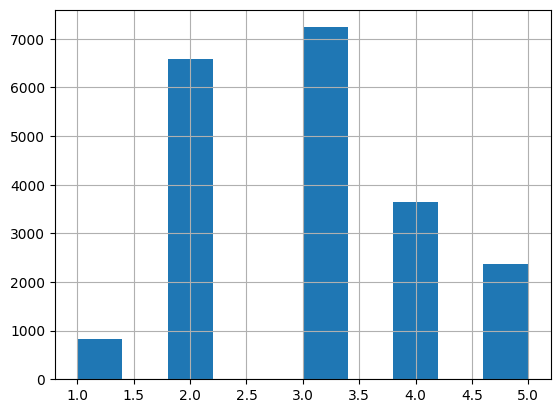

In [6]:
housing["income_cat"].hist()

In [7]:
seed = config.RANDOM_SEED = 42
test_size = config.TEST_SIZE = 0.2

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [10]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [11]:
housing_stratified = strat_train_set.copy()

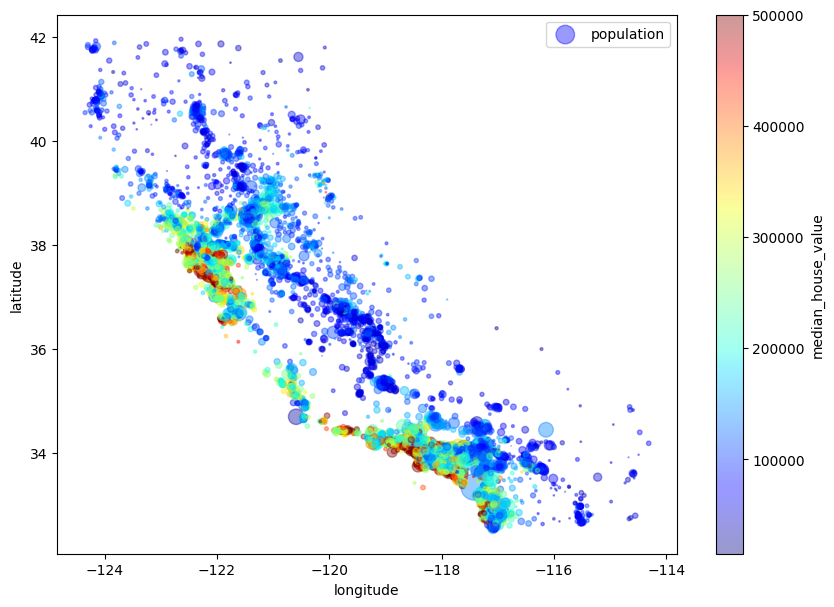

In [12]:
housing_stratified.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing_stratified["population"] / 100,
    label="population",
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.legend()

In [13]:
# Exclude a specific column before calculating the correlation matrix
correlation_matrix = housing_stratified.drop("ocean_proximity", axis=1).corr()

In [14]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

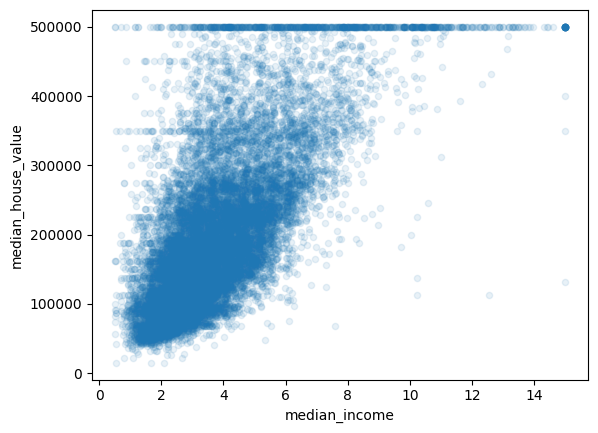

In [15]:
housing_stratified.plot(
    kind="scatter", x="median_income", y="median_house_value", alpha=0.1
)

In [16]:
# Assuming 'housing' is your DataFrame

# Identify and filter out the quirk values

quirk_values = [500001, 500000, 450000, 350000, 280000]

# Filter the DataFrame to remove rows with these quirk values
# ? ~ This is the logical NOT operator, which inverts the boolean values,
# ? so it selects rows where median_house_value is NOT in quirk_values.
housing_filtered = housing_stratified[
    ~housing_stratified["median_house_value"].isin(quirk_values)
]

<Axes: xlabel='median_income', ylabel='median_house_value'>

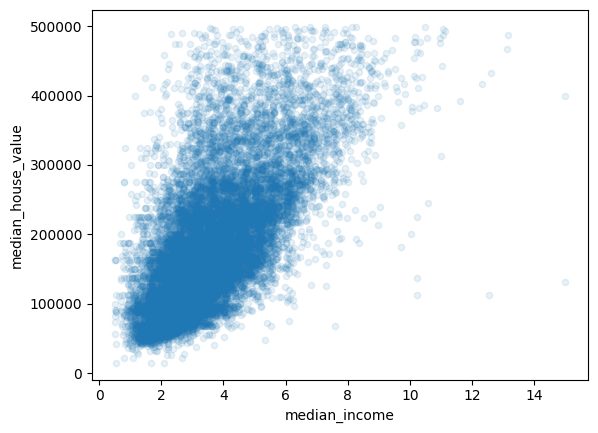

In [17]:
# The plot should be much more clear now
housing_filtered.plot(
    kind="scatter", x="median_income", y="median_house_value", alpha=0.1
)

In [18]:
housing_filtered["rooms_per_household"] = (
    housing_filtered["total_rooms"] / housing_filtered["households"]
)
housing_filtered["bedrooms_per_room"] = (
    housing_filtered["total_bedrooms"] / housing_filtered["total_rooms"]
)
housing_filtered["population_per_household"] = (
    housing_filtered["population"] / housing_filtered["households"]
)

C:\Users\alexm\AppData\Local\Temp\ipykernel_11152\2133671125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filtered["rooms_per_household"] = (
C:\Users\alexm\AppData\Local\Temp\ipykernel_11152\2133671125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filtered["bedrooms_per_room"] = (
C:\Users\alexm\AppData\Local\Temp\ipykernel_11152\2133671125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [19]:
correlation_matrix = housing_filtered.drop("ocean_proximity", axis=1).corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.657547
total_rooms                 0.152486
rooms_per_household         0.112704
households                  0.099915
total_bedrooms              0.078187
housing_median_age          0.068192
population                  0.016383
population_per_household   -0.025068
longitude                  -0.039849
latitude                   -0.153675
bedrooms_per_room          -0.245399
Name: median_house_value, dtype: float64

# DATA CLEANING

In [20]:
X = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()

X_num = X.drop("ocean_proximity", axis=1)

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
#! Prod code


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(
        self, add_bedrooms_per_room=True, columns=None
    ):  # Adding columns as an argument
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.columns = columns

    def fit(self, X, y=None):
        if self.columns is not None:
            self.rooms_ix = self.columns.index("total_rooms")
            self.bedrooms_ix = self.columns.index("total_bedrooms")
            self.population_ix = self.columns.index("population")
            self.households_ix = self.columns.index("households")
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, self.rooms_ix] / X[:, self.households_ix]
        population_per_household = X[:, self.population_ix] / X[:, self.households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, self.bedrooms_ix] / X[:, self.rooms_ix]
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

col_names = list(X_num)
#! Prod code
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder(columns=col_names)),
        ("std_scaler", StandardScaler()),
    ]
)
X_num_tr = num_pipeline.fit_transform(X_num)

In [23]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ]
)
housing_prepared = full_pipeline.fit_transform(X)

In [27]:
type(housing_prepared)

numpy.ndarray

# PREDICTIONS

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, y)

LinearRegression()

In [99]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [100]:
# * The model is underfitting, we need more complex model
lin_rmse

np.float64(68627.87390018745)

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, y)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# * This model is probably overfitting the data

np.float64(0.0)

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, housing_prepared, y, scoring="neg_mean_squared_error", cv=10
)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [72399.06771229 69436.66939607 69486.90243043 73774.58011508
 69774.53773555 76974.90476348 72696.51109112 72986.99606497
 67821.57049483 70219.02098498]
Mean: 71557.07607888067
Standard deviation: 2569.5467462988995


The decision tree clearly overfits and performs worse than linear regression. 

In [103]:
lin_scores = cross_val_score(
    lin_reg, housing_prepared, y, scoring="neg_mean_squared_error", cv=10
)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180616


In [104]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, y)
forest_scores = cross_val_score(
    forest_reg, housing_prepared, y, scoring="neg_mean_squared_error", cv=10
)
forest_rmse = np.sqrt(-lin_scores)
forest_rmse

array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
       66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
       66443.28836884, 70139.79923956])

In [105]:
display_scores(forest_rmse)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180616


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)

grid_search.fit(housing_prepared, y)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors),
    )
)

# EXERCISES